## Log data munging and EDA

Just getting set up, testing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'../')
import mysticbit
from mysticbit import munging, ml, plots

Do you really want to drill me?
Do you really want to make me cry
AH AH AH AH


In [3]:
df_logs = munging.load_log_data()
df_logs.head(2)

,PSEUDO_DEPTH,TEMP,CALI,GR,ILD,NPHI,RHOB,DT,TVD,TVDSS,...,PHIE,PHIT,SW,EF,PERFOS,RES_ID,WELL_ID,X,Y,HACKANAME
0,2074.53,87.19,10.31,55.08,3.3128,0.1678,2.3124,108.95,1588.62,1566.62,...,0.0591,0.2066,0.5863,5,0,3005,210075859,15,20.0,B03
1,2074.68,87.20,10.25,52.89,3.6592,0.1739,2.2895,110.91,1588.77,1566.77,...,0.0871,0.2222,0.5225,5,0,3005,210075859,15,20.0,B03


In [4]:
df_ml = munging.create_ml_dataframe(df_logs)
df_ml.head(2)

,HACKANAME,TVDSS,RES_ID,GR,GR_lag_0,GR_lag_2,GR_lag_4,GR_lag_6,GR_lag_8,GR_lag_10,...,GR_lag_40,GR_lag_42,GR_lag_44,GR_lag_46,GR_lag_48,GR_futr_2,GR_futr_4,GR_futr_6,GR_futr_8,GR_futr_10
0,B03,1647,2990.0,46.518571,46.518571,67.614,72.997143,58.240000,59.267143,58.670,...,49.958333,57.498,34.288,36.278571,53.503333,40.232,45.875714,42.268571,37.565,38.027143
1,B03,1648,2900.0,36.295000,36.295000,59.815,73.450000,66.115714,49.070000,71.245,...,58.601429,55.180,36.400,42.234286,51.245000,38.140,44.071667,44.007143,35.380,47.005000


In [5]:
df_ml_train, df_ml_test = ml.train_test_split(df_ml)

Train well:  {'B0700', 'B200', 'G15', 'B12', 'G16', 'B13', 'B08', 'G17', 'B14', 'G12', 'G08', 'G09', 'G06'}
Test wells:  {'B05', 'B06', 'B03'}


In [6]:
X_cols = [c for c in df_ml_train.columns if 'lag' in c]
y_cols = [c for c in df_ml_train.columns if 'futr' in c]

print('X cols: ', X_cols)
print('y cols: ', y_cols)

# Train model
model = ml.make_model(df_ml_train, X_cols, y_cols)

X cols:  ['GR_lag_0', 'GR_lag_2', 'GR_lag_4', 'GR_lag_6', 'GR_lag_8', 'GR_lag_10', 'GR_lag_12', 'GR_lag_14', 'GR_lag_16', 'GR_lag_18', 'GR_lag_20', 'GR_lag_22', 'GR_lag_24', 'GR_lag_26', 'GR_lag_28', 'GR_lag_30', 'GR_lag_32', 'GR_lag_34', 'GR_lag_36', 'GR_lag_38', 'GR_lag_40', 'GR_lag_42', 'GR_lag_44', 'GR_lag_46', 'GR_lag_48']
y cols:  ['GR_futr_2', 'GR_futr_4', 'GR_futr_6', 'GR_futr_8', 'GR_futr_10']


In [7]:
df_pred = ml.make_predictions(model, df_ml, X_cols, y_cols)

In [8]:
df_pred.head()

,HACKANAME,TVDSS,RES_ID,GR,GR_lag_0,GR_lag_2,GR_lag_4,GR_lag_6,GR_lag_8,GR_lag_10,...,GR_futr_2,GR_futr_4,GR_futr_6,GR_futr_8,GR_futr_10,GR_futr_2_pred,GR_futr_4_pred,GR_futr_6_pred,GR_futr_8_pred,GR_futr_10_pred
0,B03,1647,2990.0,46.518571,46.518571,67.614000,72.997143,58.240000,59.267143,58.670000,...,40.232000,45.875714,42.268571,37.565000,38.027143,55.070111,65.069381,66.828429,65.083107,78.045542
1,B03,1648,2900.0,36.295000,36.295000,59.815000,73.450000,66.115714,49.070000,71.245000,...,38.140000,44.071667,44.007143,35.380000,47.005000,43.676368,61.228387,56.701767,67.189933,66.592083
2,B03,1649,2900.0,40.232000,40.232000,46.518571,67.614000,72.997143,58.240000,59.267143,...,45.875714,42.268571,37.565000,38.027143,49.382500,45.334802,75.672929,66.213556,76.441839,73.173931
3,B03,1650,2900.0,38.140000,38.140000,36.295000,59.815000,73.450000,66.115714,49.070000,...,44.071667,44.007143,35.380000,47.005000,45.041429,51.395486,62.492965,69.101248,78.425268,50.826283
4,B03,1651,2900.0,45.875714,45.875714,40.232000,46.518571,67.614000,72.997143,58.240000,...,42.268571,37.565000,38.027143,49.382500,37.011429,65.907238,69.235981,75.368238,67.422761,67.759342


In [9]:
well_name = 'B05'
bit_depth = 1750

predictions = munging.get_log_predictions(df_pred, well_name, bit_depth)
predictions

,HACKANAME,TVDSS_bit_depth,pred_col,value,offset,log_name,TVDSS
0,B05,1750,GR_futr_2_pred,55.921871,2.0,GR,1752.0
1,B05,1750,GR_futr_4_pred,74.962360,4.0,GR,1754.0
2,B05,1750,GR_futr_6_pred,67.339119,6.0,GR,1756.0
3,B05,1750,GR_futr_8_pred,68.742190,8.0,GR,1758.0
4,B05,1750,GR_futr_10_pred,70.494090,10.0,GR,1760.0


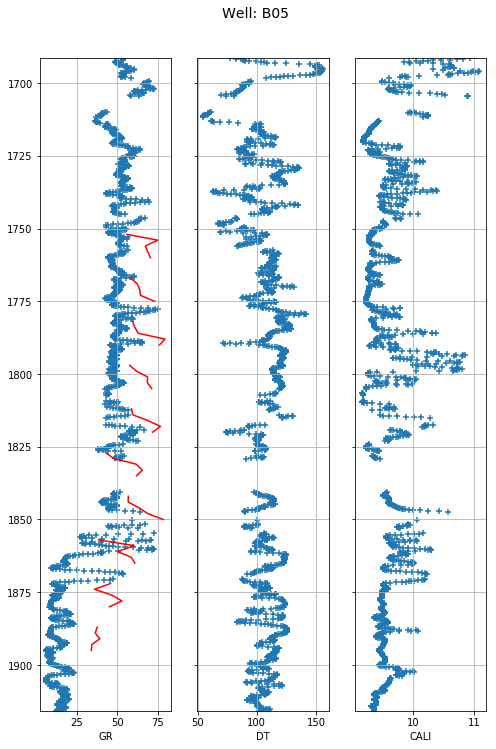

In [10]:
f, ax = plots.make_log_plot(df_logs, 'B05')

for bit in range(1750, 1900, 15):
    try:
        predictions = munging.get_log_predictions(df_pred, well_name, bit)
        ax[0].plot(predictions['value'], predictions['TVDSS'], 'red')
    except AssertionError:
        pass